In [26]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import doxapy
import tifffile as tiff

def binarize(img):
    img = img.convert('L').filter(ImageFilter.GaussianBlur(radius = 0.8)) 
    gray_arr = np.array(img)

    binary_image = np.empty(gray_arr.shape, gray_arr.dtype)
    facsimile = doxapy.Binarization(doxapy.Binarization.Algorithms.WOLF)
    facsimile.initialize(gray_arr)
    facsimile.to_binary(binary_image)

    return binary_image


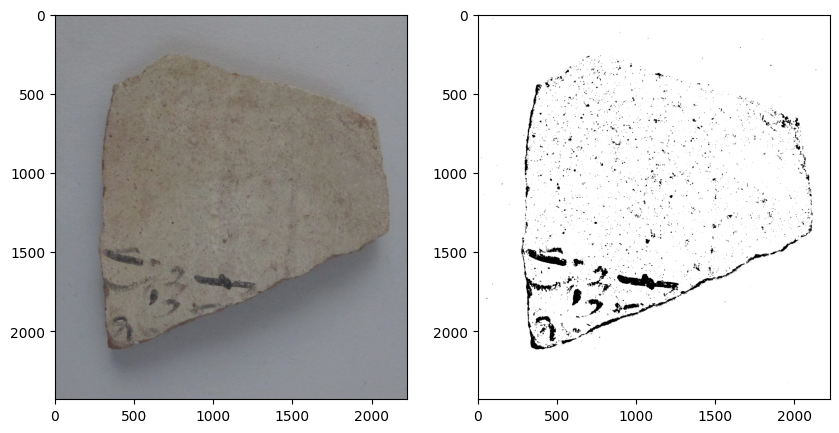

In [17]:
im = Image.open('original-1-7.JPG').convert("RGBA")
img_arr = np.array(im)
binary_arr = binarize(im)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(Image.fromarray(img_arr))
axes[1].imshow(Image.fromarray(binary_arr),cmap="gray")

In [18]:
print(img_arr.shape, img_arr.size)
print(binary_arr.shape, binary_arr.size)


(2430, 2225, 4) 21627000
(2430, 2225) 5406750


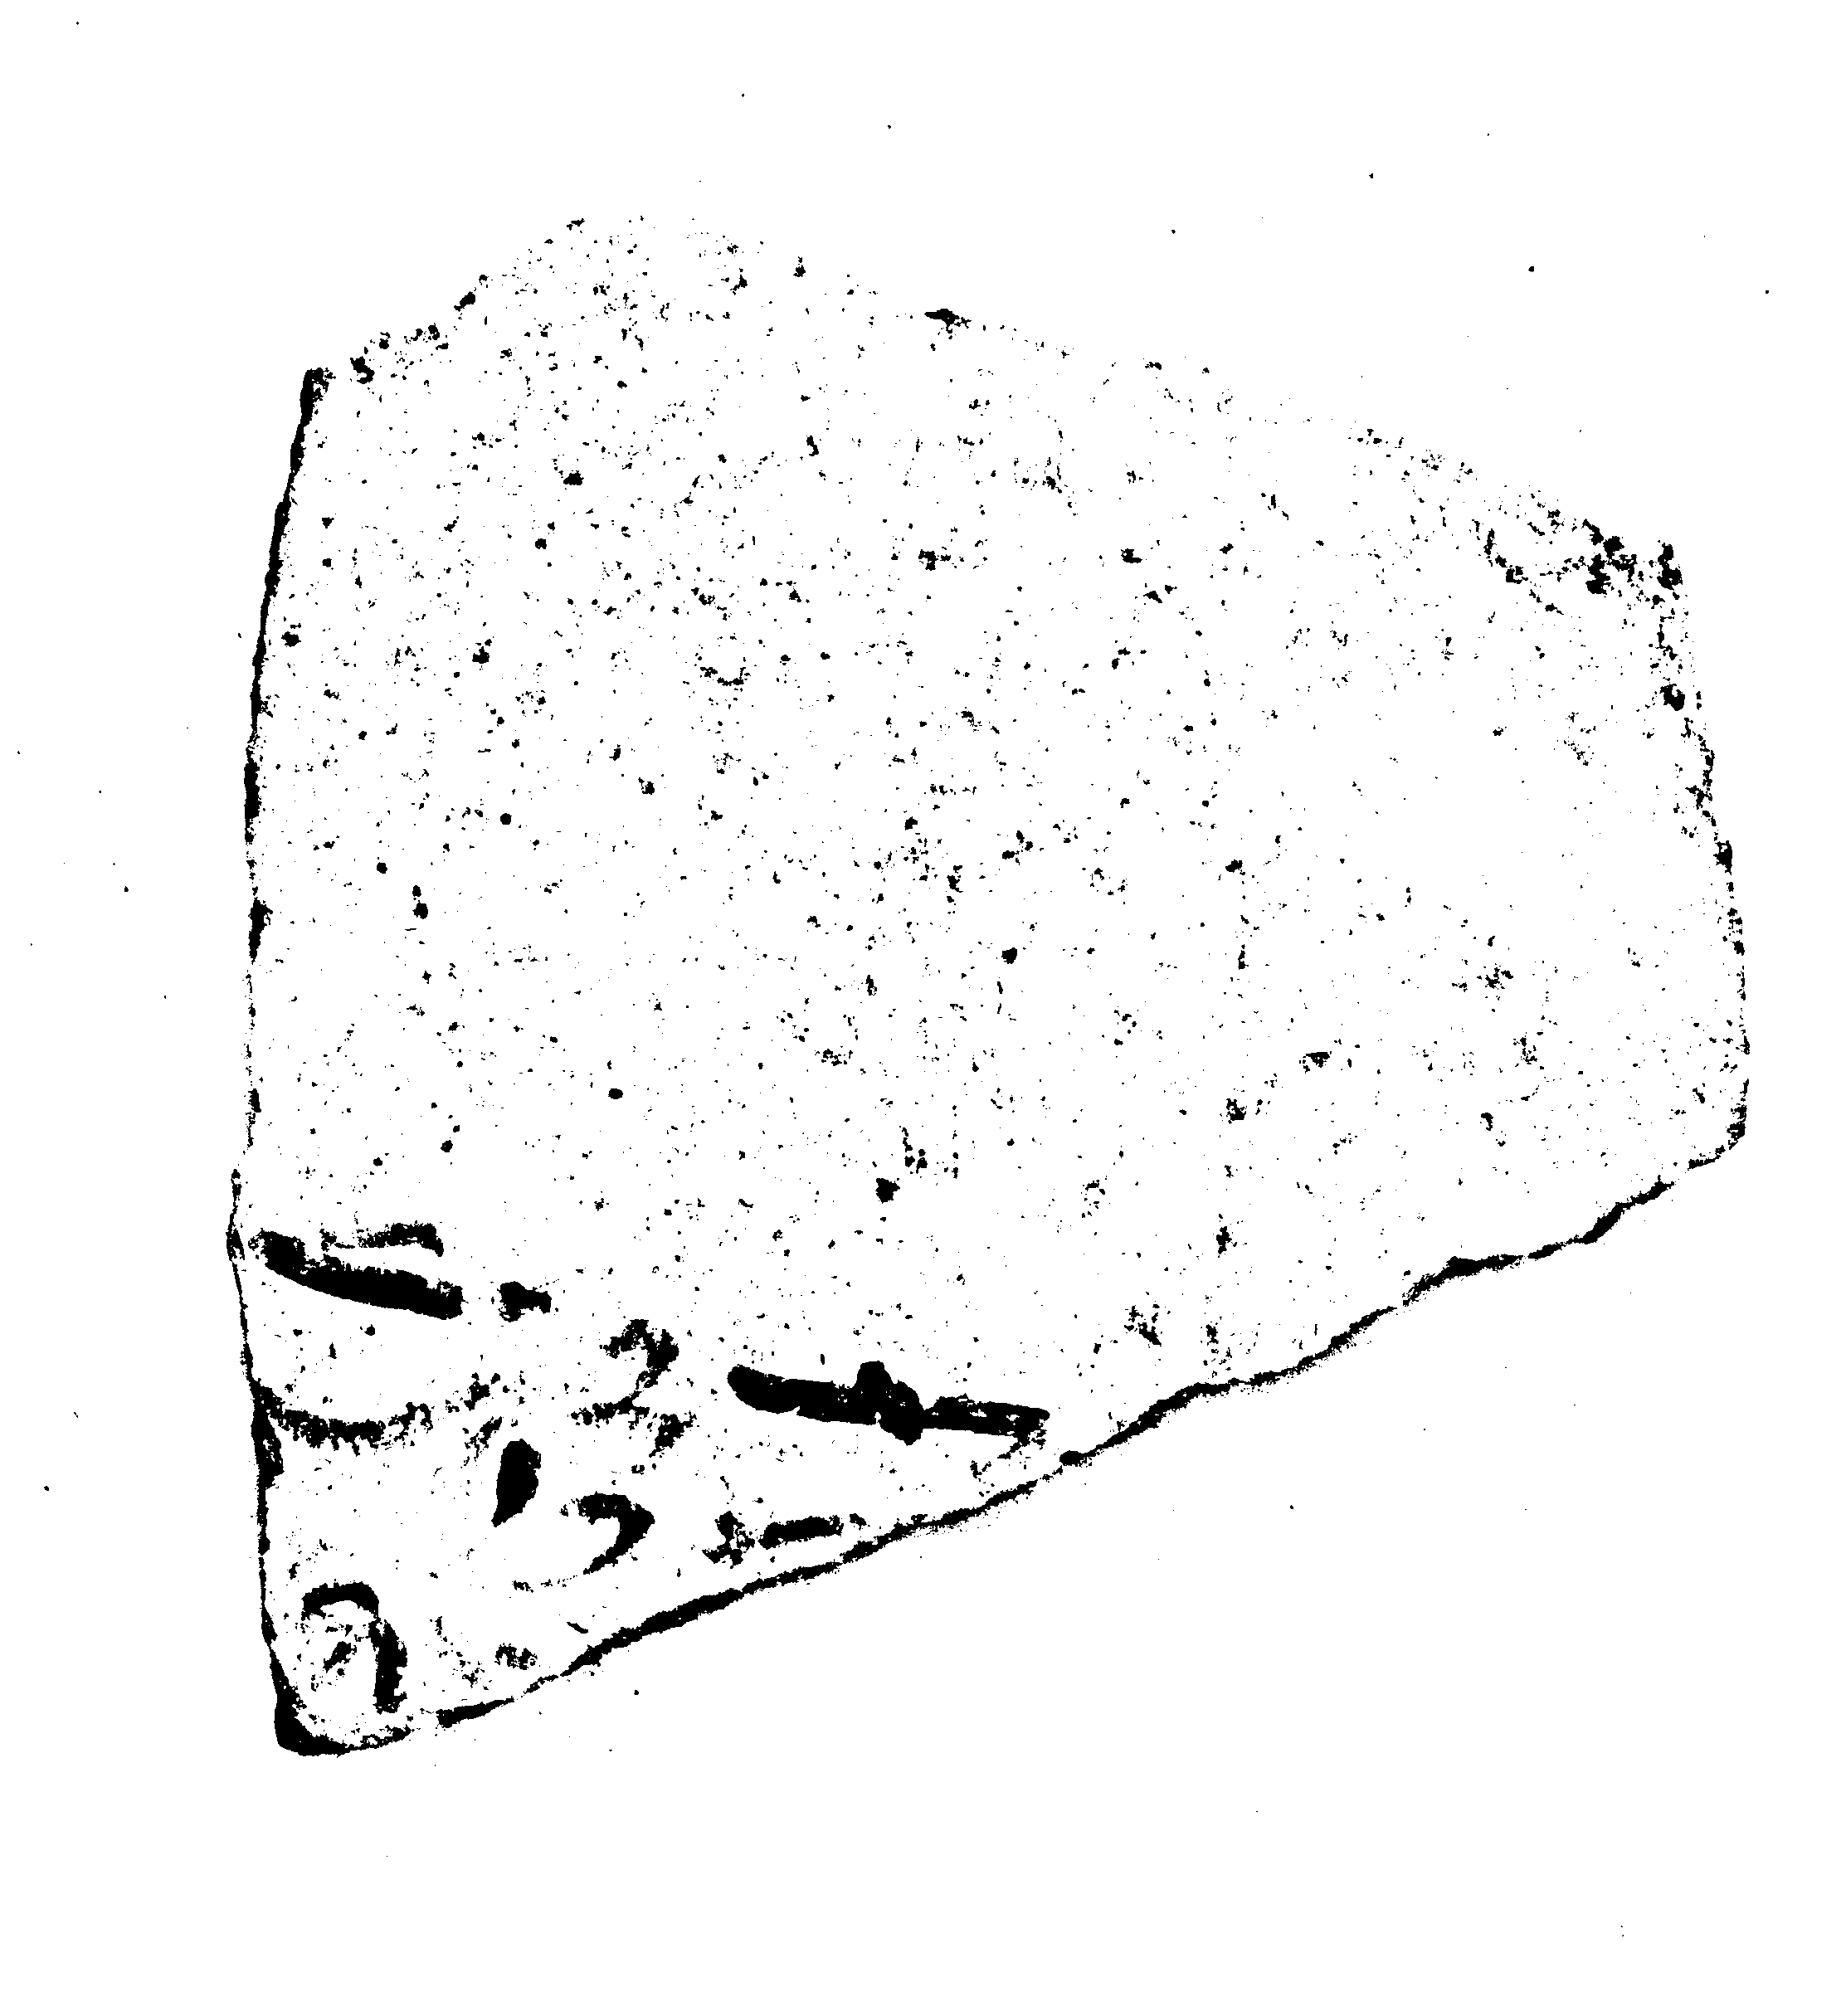

In [24]:
overlay_arr = np.stack([binary_arr] * 3 + [np.full_like(binary_arr, 255)], axis=-1)

white_pixels = (overlay_arr[:, :, 0] == 255)
overlay_arr[white_pixels, 3] = 0

Image.fromarray(overlay_arr)


In [32]:
stacked_images = np.stack([overlay_arr, img_arr], axis=0)
# Save as a multi-layer TIFF file
tiff.imwrite("stacked_images.tif", stacked_images, photometric='rgb')
# imwrite('temp.tif', data, photometric='rgb')

(2154, 1518)

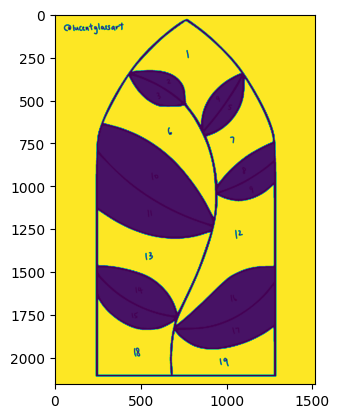

In [50]:
image = tiff.imread('leaf.tiff')
plt.imshow(image[:,:,2])
image[:,:,1].shape
